**Setup the cw**

CRYPTO_TARGET='SPHINCSplus'
PLATFORM='CW308_STM32F3'

In [974]:
import time
import chipwhisperer as cw
scope = cw.scope()
target = cw.target(scope, cw.targets.SimpleSerial) #cw.targets.SimpleSerial can be omitted
scope.default_setup()

**Compile the code**

In [1153]:
%%bash
#please find your own sphincsplus

cd ../../hardware/victims/firmware/simpleserial-sphincsplus/

# make PLATFORM='CW308_STM32F3' CRYPTO_TARGET=SPHINCSplus
make PLATFORM='CW308_STM32F3' CRYPTO_TARGET=SPHINCSplus



SS_VER set to SS_VER_1_1
SS_VER set to SS_VER_1_1
Blank crypto options, building for AES128
SS_VER set to SS_VER_1_1
SS_VER set to SS_VER_1_1
Blank crypto options, building for AES128
make[1]: '.dep' is up to date.
SS_VER set to SS_VER_1_1
SS_VER set to SS_VER_1_1
Blank crypto options, building for AES128
.
Welcome to another exciting ChipWhisperer target build!!
arm-none-eabi-gcc (15:10.3-2021.07-4) 10.3.1 20210621 (release)
Copyright (C) 2020 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.

.
Compiling:
-en     simpleserial-sphincsplus.c ...
-e Done!
.
Compiling:
-en     .././simpleserial/simpleserial.c ...
-e Done!
.
Compiling:
-en     .././hal/stm32f3/stm32f3_hal.c ...
-e Done!
.
Compiling:
-en     .././hal/stm32f3/stm32f3_hal_lowlevel.c ...
-e Done!
.
Compiling:
-en     .././hal/stm32f3/stm32f3_sysmem.c ...
-e Done!
.
Compiling:
-en     .././crypto/

**Program**

In [1154]:
#please find your .hex file after compilation
cw.program_target(scope, cw.programmers.STM32FProgrammer, "/home/z/chipwhisperer/hardware/victims/firmware/simpleserial-sphincsplus/simpleserial-sphincsplus-CW308_STM32F3.hex")


Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 14351 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 14351 bytes


**Communicate with target**

In [317]:
print(target.read())

ûº" áSPHINCS+



In [349]:
msg = bytearray([3]*32) #simpleserial uses bytearrays
scope.arm()
target.simpleserial_write('a', msg)


In [350]:
print(target.read(5000,1000))


rC133656B89672C806A7FB33407D5920415BEFA83AB0470D2FBC117733C8BF95E
z00



In [10]:
msg = bytearray([3]*32) #simpleserial uses bytearrays
scope.arm()
target.simpleserial_write('b', msg)
# ret = scope.capture()

In [12]:
#returns wots pk and first 32-byte signature
#please wait about 1 seconds before read
print(target.read(5000,1000))

r506F1095CEED10943AAD60476F8E14B46752A6F6714863C4A3B255B3796C67CC
rF9CE02E17F02CB7FD23089875611C63A511387709EC8BAD0E7A203BF2F8F5976
z00



In [322]:
msg1 = 32*b'\x00'
msg = bytearray(msg1) #simpleserial uses bytearrays
target.simpleserial_write('c', msg1)


In [331]:
#please wait about 1 min before read
print(target.read(5000,1000))


rE4E882DE28650A2BBDCF78DC24C91976E15CA409D405C53E2C0B7FFFC46CD260
z00



In [25]:
#read the root of merkel, which takes about 30 seconds. 
print(target.read(5000,1000))


rE4E882DE28650A2BBDCF78DC24C91976E15CA409D405C53E2C0B7FFFC46CD260
z00



***Obtain a faulty WOTS by sending glitch***

***to save time, here we use hash as an example, you may switch to WOTS by changing command 'a' to 'c'***

In [416]:
msg = bytearray([3]*32) #simpleserial uses bytearrays
scope.arm()
target.simpleserial_write('a', msg)
ret = scope.capture()


In [417]:
#please wait around 1 min before read back
result = target.simpleserial_read_witherrors('r',32 , glitch_timeout=10)


In [418]:
print(result)

{'valid': True, 'payload': bytearray(b'\xc13ek\x89g,\x80j\x7f\xb34\x07\xd5\x92\x04\x15\xbe\xfa\x83\xab\x04p\xd2\xfb\xc1\x17s<\x8b\xf9^'), 'full_response': 'rC133656B89672C806A7FB33407D5920415BEFA83AB0470D2FBC117733C8BF95E\n', 'rv': 0}


In [419]:
payload = result['payload'].hex()
print(payload)

c133656b89672c806a7fb33407d5920415befa83ab0470d2fbc117733c8bf95e


***Having an expection output, glitching begins***

In [469]:
scope.glitch.clk_src = "clkgen"
scope.glitch.trigger_src = "ext_single" # glitch only after scope.arm() called
scope.glitch.output = "clock_xor" # glitch_out = clk ^ glitch

scope.io.hs2 = "glitch"
# scope.glitch.ext_offset = 8
# scope.glitch.offset = 5
# scope.glitch.width = 20
scope.glitch.repeat = 10

In [489]:
collections = { 'faulty': [], 'reset': [],'valid': []}

(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:934) Negative offsets <-45 may result in double glitches!
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:934) Negative offsets <-45 may result in double glitches!
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfigurati

Trigger still high!
Trigger still high!
Trigger still high!


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work


Trigger still high!
Trigger still high!
Trigger still high!
Trigger still high!
Trigger still high!


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work


Trigger still high!
Trigger still high!
Trigger still high!
Trigger still high!
Trigger still high!


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work


Trigger still high!
Trigger still high!
Trigger still high!
Trigger still high!
Trigger still high!


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work


Trigger still high!
Trigger still high!
Trigger still high!
Trigger still high!


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work


Trigger still high!
Trigger still high!
Trigger still high!
Trigger still high!
Trigger still high!


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work


Trigger still high!
Trigger still high!
Trigger still high!
Trigger still high!
Trigger still high!
Trigger still high!


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work


Trigger still high!
Trigger still high!
Trigger still high!
Trigger still high!
Trigger still high!


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfiguration for offset = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfiguration for offset = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfiguration for offset = 0 may not work


Trigger still high!


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfiguration for offset = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfiguration for offset = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfiguration for offset = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfiguration for offset = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfiguration for offset = 0 may not work


2 0 10 0 e04e1b1061072a0b4f787d7ccee1121b8298144342974eb0f0a45b758f1b6c7e


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfiguration for offset = 0 may not work


Trigger still high!


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfiguration for offset = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfiguration for offset = 0 may not work


2 0 16 0 db2c69070d48c0118d684ff9af2fd26eb7bca4e27dca0f042f4a49a460f072f4


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfiguration for offset = 0 may not work


Trigger still high!


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfiguration for offset = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfiguration for offset = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfiguration for offset = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfiguration for offset = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfiguration for offset = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfiguration for offset = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfiguration for offset = 0 may not work


Trigger still high!


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfiguration for offset = 0 may not work


Trigger still high!


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfiguration for offset = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfiguration for offset = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfiguration for offset = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfiguration for offset = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfiguration for offset = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work


Trigger still high!
Trigger still high!
Trigger still high!
Trigger still high!
Trigger still high!


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work


Trigger still high!
Trigger still high!
Trigger still high!
Trigger still high!


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work


Trigger still high!
Trigger still high!
Trigger still high!


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work


Trigger still high!
Trigger still high!


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work


Trigger still high!


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work


Trigger still high!


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work


Trigger still high!


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration f

Trigger still high!


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work


Trigger still high!


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:934) Negative offsets <-45 may result in double glitches!
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work


Trigger still high!


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:934) Negative offsets <-45 may result in double glitches!
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration

Trigger still high!


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work


Trigger still high!
Trigger still high!
Trigger still high!
Trigger still high!


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work


Trigger still high!
Trigger still high!
Trigger still high!
Trigger still high!
Trigger still high!


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work


Trigger still high!
Trigger still high!
Trigger still high!
Trigger still high!


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work


Trigger still high!
Trigger still high!
Trigger still high!
Trigger still high!


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work


Trigger still high!
Trigger still high!
Trigger still high!
Trigger still high!


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work


Trigger still high!
Trigger still high!
Trigger still high!
Trigger still high!


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work


3 -4 2 0 1030000000000000000000000000000000000000000000000000000000000000
Trigger still high!
Trigger still high!
Trigger still high!
Trigger still high!
Trigger still high!


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work


Trigger still high!
Trigger still high!
Trigger still high!
Trigger still high!
Trigger still high!


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfiguration for offset = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfiguration for offset = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfiguration for offset = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfiguration for offset = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfiguration for offset = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfiguration for offset = 0 may not work


Trigger still high!


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfiguration for offset = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfiguration for offset = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfiguration for offset = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfiguration for offset = 0 may not work


Trigger still high!


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfiguration for offset = 0 may not work


Trigger still high!


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfiguration for offset = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfiguration for offset = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfiguration for offset = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfiguration for offset = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfiguration for offset = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfiguration for offset = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfiguration for offset = 0 may not work


Trigger still high!


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfiguration for offset = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfiguration for offset = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfiguration for offset = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfiguration for offset = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfiguration for offset = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfiguration for offset = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfiguration for offset = 0 may not work


Trigger still high!


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work


Trigger still high!
Trigger still high!
Trigger still high!
Trigger still high!
Trigger still high!


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work


Trigger still high!
Trigger still high!
Trigger still high!
Trigger still high!


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work


Trigger still high!
Trigger still high!
Trigger still high!


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work


Trigger still high!
Trigger still high!


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work


Trigger still high!


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work


Trigger still high!


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work


Trigger still high!


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration f

Trigger still high!


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work


Trigger still high!


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work


Trigger still high!
Trigger still high!
Trigger still high!


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work


Trigger still high!
Trigger still high!
Trigger still high!
Trigger still high!
Trigger still high!


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work


Trigger still high!
Trigger still high!
Trigger still high!
Trigger still high!
Trigger still high!


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work


Trigger still high!
Trigger still high!
Trigger still high!
Trigger still high!
Trigger still high!


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work


Trigger still high!
Trigger still high!
Trigger still high!
Trigger still high!


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work


Trigger still high!
Trigger still high!
Trigger still high!
Trigger still high!
Trigger still high!


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work


Trigger still high!
Trigger still high!
Trigger still high!
Trigger still high!
Trigger still high!
Trigger still high!


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work


Trigger still high!
Trigger still high!
Trigger still high!
Trigger still high!
Trigger still high!
Trigger still high!
Trigger still high!
Trigger still high!


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfiguration for offset = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfiguration for offset = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfiguration for offset = 0 may not work


4 -2 46 0 5280b9a9e4e003784e5523d3beffaec5e5f2e4787b41057f48ee4a3b4b8739e8


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfiguration for offset = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfiguration for offset = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfiguration for offset = 0 may not work


Trigger still high!


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfiguration for offset = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfiguration for offset = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfiguration for offset = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfiguration for offset = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfiguration for offset = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfiguration for offset = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfiguration for offset = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfiguration for offset = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfigu

Trigger still high!
Trigger still high!
Trigger still high!
Trigger still high!
Trigger still high!


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work


Trigger still high!
Trigger still high!
Trigger still high!
Trigger still high!


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work


Trigger still high!
Trigger still high!
Trigger still high!


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work


Trigger still high!
Trigger still high!


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work


Trigger still high!


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work


Trigger still high!


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work


Trigger still high!


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work


Trigger still high!


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration f

Trigger still high!


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:934) Negative offsets <-45 may result in double glitches!
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration

Trigger still high!
Trigger still high!
5 -16 6 0 14d77f329021492f528d049aee9a1d632912817bb8807eaab3c350124fc1de33
Trigger still high!


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work


Trigger still high!
Trigger still high!
Trigger still high!
Trigger still high!
Trigger still high!


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work


Trigger still high!
Trigger still high!
Trigger still high!
Trigger still high!
Trigger still high!
Trigger still high!


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work


Trigger still high!
Trigger still high!
Trigger still high!
Trigger still high!


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work


Trigger still high!
Trigger still high!
Trigger still high!
Trigger still high!
Trigger still high!


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work


Trigger still high!
Trigger still high!
Trigger still high!
Trigger still high!
Trigger still high!


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work


Trigger still high!
Trigger still high!
Trigger still high!
Trigger still high!
Trigger still high!
Trigger still high!


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work


Trigger still high!
Trigger still high!
Trigger still high!


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfiguration for offset = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfiguration for offset = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfiguration for offset = 0 may not work


Trigger still high!


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfiguration for offset = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfiguration for offset = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfiguration for offset = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfiguration for offset = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfiguration for offset = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfiguration for offset = 0 may not work


Trigger still high!


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfiguration for offset = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfiguration for offset = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfiguration for offset = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfiguration for offset = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfiguration for offset = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfiguration for offset = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfiguration for offset = 0 may not work


Trigger still high!


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfiguration for offset = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfiguration for offset = 0 may not work


Trigger still high!


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfiguration for offset = 0 may not work


Trigger still high!


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfiguration for offset = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfiguration for offset = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfiguration for offset = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfiguration for offset = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfiguration for offset = 0 may not work


Trigger still high!


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfiguration for offset = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work


Trigger still high!
Trigger still high!
Trigger still high!
Trigger still high!
Trigger still high!


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work


Trigger still high!
Trigger still high!
Trigger still high!
Trigger still high!


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work


Trigger still high!
Trigger still high!
Trigger still high!


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work


Trigger still high!
Trigger still high!


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work


Trigger still high!


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work


Trigger still high!


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work


Trigger still high!


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration f

Done glitching


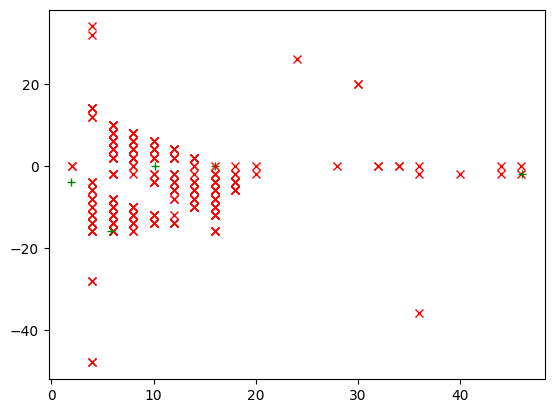

In [491]:
import chipwhisperer.common.results.glitch as glitch
from tqdm.notebook import trange
import struct


%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure()


# gc.set_range("width", 0, 48)
# gc.set_range("offset", -48, 48)


import time
TIMES = 1
msg = bytearray([3]*32) #simpleserial uses bytearrays
for lext in range(2,6,1):
            scope.glitch.ext_offset = lext

            # Useless for voltage glitching
            for loff in range(-48, 48, 2):
                scope.glitch.offset = loff

                # Almost always INVALID after 23
                for lwid in range(0, 48, 2):
                    scope.glitch.width = lwid

                    for i in range(TIMES):                       
                        if scope.adc.state:
                            # can detect crash here (fast) before timing out (slow)
                            print("Trigger still high!")
                            collections['reset'] += [(lext, loff, lwid)]
                            plt.plot(lwid, loff, 'xr', alpha=1)
#                             fig.canvas.draw()
                            #record and reboot
                            scope.io.nrst = False
                            time.sleep(0.05)
                            scope.io.nrst = "high_z"
                            time.sleep(0.05)
                        
                        scope.arm()
                        target.simpleserial_write('a', msg)
                        ret = scope.capture()

                        time.sleep(0.1) #wait 1 min long time for WOTS
                        result = target.simpleserial_read_witherrors('r', 32, glitch_timeout=10)
 
                        if ret: #true means wime out
                            print('Timeout - no trigger')       
                            collections['reset'] += [(lext, loff, lwid)]
                            plt.plot(scope.glitch.width, scope.glitch.offset, 'xr', alpha=1)
#                             fig.canvas.draw()
                            #record and reboot
                            scope.io.nrst = False
                            time.sleep(0.05)
                            scope.io.nrst = "high_z"
                            time.sleep(0.05)
                        else:
                            if result['valid'] is True:
                                collections['valid'] += [(lext, loff, lwid)]
                                if result['payload'] :
                                    payload = result['payload'].hex()
#                                   if payload[:64] != 'e4e882de28650a2bbdcf78dc24c91976e15ca409d405c53e2c0b7fffc46cd260': #exepection for WOTS
                                    if payload[:64] != 'c133656b89672c806a7fb33407d5920415befa83ab0470d2fbc117733c8bf95e':
                                        print(lext,loff,lwid,i,payload[:64])
                                        collections['faulty'] += [(lext, loff, lwid)]
                                        plt.plot(scope.glitch.width, scope.glitch.offset, '+g',alpha=1)
                                        fig.canvas.draw()
                            else: #reboot
#                                 scope.io.nrst = False
#                                 time.sleep(0.05)
#                                 scope.io.nrst = "high_z"
#                                 time.sleep(0.05) 
                                collections['reset'] += [(lext, loff, lwid)]
                               
#                              
print("Done glitching")

***plus '+' means successful Fault Injections match signaures***

In [492]:
#a successful trigger happens, may not.

print(collections)

{'faulty': [(2, 0, 10), (2, 0, 16), (3, -4, 2), (4, -2, 46), (5, -16, 6)], 'reset': [(2, -16, 2), (2, -16, 4), (2, -16, 4), (2, -16, 6), (2, -16, 14), (2, -16, 16), (2, -14, 2), (2, -14, 4), (2, -14, 4), (2, -14, 6), (2, -14, 6), (2, -14, 8), (2, -14, 8), (2, -14, 10), (2, -14, 10), (2, -14, 12), (2, -12, 2), (2, -12, 4), (2, -12, 4), (2, -12, 6), (2, -12, 6), (2, -12, 8), (2, -12, 8), (2, -12, 10), (2, -12, 14), (2, -12, 16), (2, -10, 2), (2, -10, 4), (2, -10, 4), (2, -10, 6), (2, -10, 6), (2, -10, 8), (2, -10, 12), (2, -10, 14), (2, -10, 14), (2, -10, 16), (2, -8, 2), (2, -8, 4), (2, -8, 4), (2, -8, 6), (2, -8, 12), (2, -8, 14), (2, -8, 14), (2, -8, 16), (2, -6, 2), (2, -6, 4), (2, -6, 10), (2, -6, 12), (2, -6, 12), (2, -6, 14), (2, -6, 14), (2, -6, 16), (2, -6, 16), (2, -6, 18), (2, -4, 2), (2, -4, 4), (2, -4, 8), (2, -4, 10), (2, -4, 10), (2, -4, 12), (2, -4, 12), (2, -4, 14), (2, -4, 14), (2, -4, 16), (2, -4, 16), (2, -4, 18), (2, -2, 4), (2, -2, 6), (2, -2, 12), (2, -2, 14), (2, 

In [ ]:
#sometimes it cashed and need reboot
scope.io.nrst = False
time.sleep(0.05)
scope.io.nrst = "high_z"
time.sleep(0.05)

scope

***experiment above shows how a glitch success.***

In [ ]:
#reboot
scope.io.nrst = False
time.sleep(0.05)
scope.io.nrst = "high_z"
time.sleep(0.05)

***next we collect cycles and power trace with/without cnt***

In [863]:
scope.glitch.clk_src = "clkgen"
scope.glitch.trigger_src = "ext_single" # glitch only after scope.arm() called
scope.glitch.output = "clock_xor" # glitch_out = clk ^ glitch

scope.io.hs2 = "glitch"
scope.arm() #launch the glitch


In [902]:
#call for address
count_cyc_begin = scope.adc.trig_count #record the trigger cycles
scope.arm()
msg = bytearray([3]*32) 
target.simpleserial_write('f', msg)



In [903]:
count_cyc_end = scope.adc.trig_count -count_cyc_begin #update the trigger cycles
print(count_cyc_end) #cycles for address

88712


In [904]:
count_cyc_begin = scope.adc.trig_count #record the trigger cycles
scope.arm() 
msg = bytearray([3]*36) 
target.simpleserial_write('g', msg)

In [905]:
count_cyc_end = scope.adc.trig_count -count_cyc_begin #update the trigger cycles
print(count_cyc_end)

89272


In [908]:
count_cyc_begin = scope.adc.trig_count #record the trigger cycles
scope.arm()
msg = bytearray([3]*32) 
target.simpleserial_write('a', msg)



In [909]:
count_cyc_end = scope.adc.trig_count -count_cyc_begin #update the trigger cycles
print(count_cyc_end) #cycles 

82384


In [910]:
count_cyc_begin = scope.adc.trig_count #record the trigger cycles
scope.arm()
msg = bytearray([3]*32) 
target.simpleserial_write('b', msg)



In [914]:
count_cyc_end = scope.adc.trig_count -count_cyc_begin #update the trigger cycles
print(count_cyc_end) #cycles 

89603348


In [915]:
count_cyc_begin = scope.adc.trig_count #record the trigger cycles
scope.arm()
msg = bytearray([3]*32) 
target.simpleserial_write('c', msg)



In [934]:
count_cyc_end = scope.adc.trig_count -count_cyc_begin #update the trigger cycles
print(count_cyc_end) #cycles 

1434701680


***Trace capture***

In [1052]:
scope.arm()
msg = bytearray([3]*32) 
target.simpleserial_write('f', msg)


In [1053]:
scope.capture() #wait for trigger, only functions having trigger() will work, otherwise it turns to timeout.
trace1 = scope.get_last_trace()
print(trace1)#power trace

[ 0.01367188 -0.11230469 -0.09082031 ... -0.0078125   0.09277344
  0.14355469]


<IPython.core.display.Javascript object>


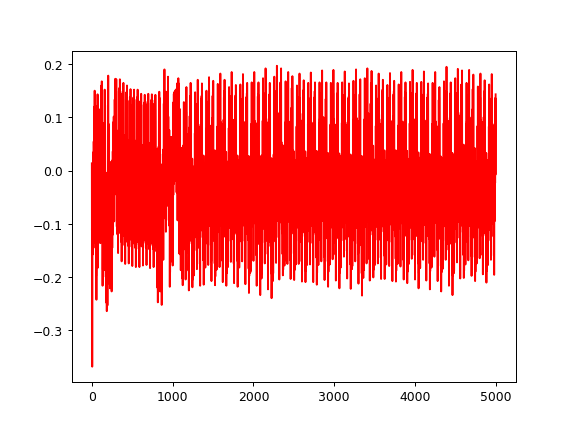

In [1054]:
%matplotlib notebook
import matplotlib.pylab as plt
plt.figure()
plt.plot(trace1,"r")
plt.show()

In [1055]:
scope.arm()
msg = bytearray([3]*36) 
target.simpleserial_write('g', msg)


In [1056]:
scope.capture() #wait for trigger, only functions having trigger() will work, otherwise it turns to timeout.
trace2 = scope.get_last_trace()
print(trace2)#power trace

[ 0.01269531 -0.11328125 -0.08984375 ... -0.00878906  0.09179688
  0.14355469]


<IPython.core.display.Javascript object>


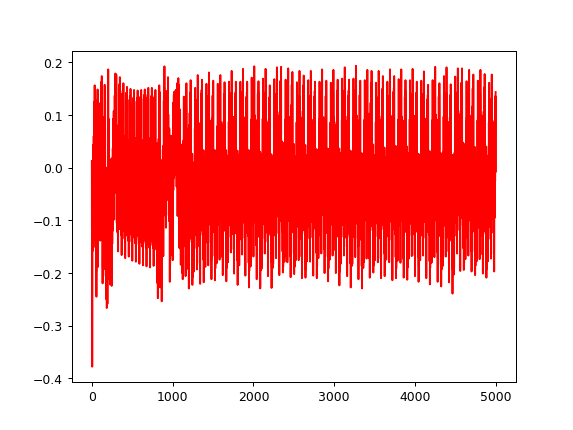

In [1057]:
%matplotlib notebook
import matplotlib.pylab as plt
plt.figure()
plt.plot(trace2,"r")
plt.show()

***Two power traces look same. We can compliment TVLA if needed.***

***now let us look into countermeasure to see whether FA can hit the address***

In [1101]:
scope.glitch.clk_src = "clkgen"
scope.glitch.trigger_src = "ext_single" # glitch only after scope.arm() called
scope.glitch.output = "clock_xor" # glitch_out = clk ^ glitch

scope.io.hs2 = "glitch"
# scope.glitch.ext_offset = 8
# scope.glitch.offset = 5
# scope.glitch.width = 20
scope.glitch.repeat = 10

In [1151]:
scope.arm()
msg = bytearray([3]*32) 
target.simpleserial_write('f', msg)


In [1152]:
# print(target.read(5000,1000))
result = target.simpleserial_read_witherrors('r', 8, glitch_timeout=10)
print(result)

{'valid': True, 'payload': bytearray(b'D\xb3)\xe96\x19\xb8\xac'), 'full_response': 'r44B329E93619B8AC\n', 'rv': 0}


In [1134]:
payload = result['payload'].hex()
print(payload)

AttributeError: 'NoneType' object has no attribute 'hex'

In [1157]:
collections = { 'faulty': [], 'reset': [],'valid': []}

(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:934) Negative offsets <-45 may result in double glitches!
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:934) Negative offsets <-45 may result in double glitches!
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfigurati

Trigger still high!


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work


Trigger still high!
Trigger still high!
Trigger still high!
Trigger still high!
2 -16 10 0 f0010523942979a4
Trigger still high!
Trigger still high!


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work


Trigger still high!
Trigger still high!
Trigger still high!
Trigger still high!
Trigger still high!
Trigger still high!
Trigger still high!


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work


Trigger still high!
Trigger still high!
Trigger still high!
Trigger still high!
Trigger still high!
Trigger still high!


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work


Trigger still high!
Trigger still high!
Trigger still high!
Trigger still high!
2 -10 16 0 f0010523942979a4


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work


Trigger still high!
Trigger still high!
Trigger still high!
Trigger still high!
Trigger still high!
Trigger still high!


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work


Trigger still high!
Trigger still high!
Trigger still high!
Trigger still high!
Trigger still high!


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work


Trigger still high!
Trigger still high!
Trigger still high!
Trigger still high!
Trigger still high!
Trigger still high!


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work


Trigger still high!
Trigger still high!
Trigger still high!
Trigger still high!
Trigger still high!


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfiguration for offset = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfiguration for offset = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfiguration for offset = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfiguration for offset = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfiguration for offset = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfiguration for offset = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfiguration for offset = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfigur

Trigger still high!


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfiguration for offset = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfiguration for offset = 0 may not work


2 0 16 0 65b23533f4ea8673


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfiguration for offset = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfiguration for offset = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfiguration for offset = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfiguration for offset = 0 may not work


Trigger still high!


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfiguration for offset = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfiguration for offset = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfiguration for offset = 0 may not work


Trigger still high!


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfiguration for offset = 0 may not work


Trigger still high!


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfiguration for offset = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfiguration for offset = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfiguration for offset = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfiguration for offset = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfiguration for offset = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work


Trigger still high!
Trigger still high!
Trigger still high!
Trigger still high!
Trigger still high!
Trigger still high!


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work


Trigger still high!
Trigger still high!
Trigger still high!
Trigger still high!
Trigger still high!


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work


Trigger still high!
Trigger still high!
Trigger still high!
Trigger still high!


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work


Trigger still high!
Trigger still high!
2 8 8 0 f0010523942979a4


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work


Trigger still high!


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work


Trigger still high!


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work


Trigger still high!


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration f

Trigger still high!


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:934) Negative offsets <-45 may result in double glitches!
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work


Trigger still high!


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work


3 -28 2 0 65b23533f4ea8673


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work


Trigger still high!
Trigger still high!
Trigger still high!
Trigger still high!


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work


Trigger still high!
Trigger still high!
Trigger still high!
Trigger still high!
Trigger still high!
Trigger still high!


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work


Trigger still high!
Trigger still high!
Trigger still high!
Trigger still high!
Trigger still high!


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work


Trigger still high!
Trigger still high!
Trigger still high!
Trigger still high!
Trigger still high!


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work


Trigger still high!
Trigger still high!
Trigger still high!
Trigger still high!
Trigger still high!


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work


Trigger still high!
Trigger still high!
Trigger still high!
Trigger still high!
Trigger still high!


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work


Trigger still high!
Trigger still high!
Trigger still high!
Trigger still high!
Trigger still high!
Trigger still high!


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work


3 -2 4 0 0000000000000000
Trigger still high!
Trigger still high!
Trigger still high!
Trigger still high!
Trigger still high!


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfiguration for offset = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfiguration for offset = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfiguration for offset = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfiguration for offset = 0 may not work


Trigger still high!


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfiguration for offset = 0 may not work


Trigger still high!


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfiguration for offset = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfiguration for offset = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfiguration for offset = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfiguration for offset = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfiguration for offset = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfiguration for offset = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfiguration for offset = 0 may not work


Trigger still high!


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfiguration for offset = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfiguration for offset = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfiguration for offset = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfiguration for offset = 0 may not work


Trigger still high!


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfiguration for offset = 0 may not work


Trigger still high!


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfiguration for offset = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfiguration for offset = 0 may not work


Trigger still high!


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfiguration for offset = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfiguration for offset = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfiguration for offset = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfiguration for offset = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfiguration for offset = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfiguration for offset = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work


Trigger still high!
Trigger still high!
Trigger still high!
Trigger still high!
Trigger still high!
Trigger still high!


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work


Trigger still high!
Trigger still high!
Trigger still high!
Trigger still high!
Trigger still high!


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work


Trigger still high!
Trigger still high!
Trigger still high!


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work


Trigger still high!
Trigger still high!


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work


Trigger still high!
Trigger still high!


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work


Trigger still high!


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration f

Trigger still high!


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:934) Negative offsets <-45 may result in double glitches!
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work


Trigger still high!


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work


Trigger still high!


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work


Trigger still high!
Trigger still high!
Trigger still high!


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work


Trigger still high!
Trigger still high!
Trigger still high!


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work


Trigger still high!
Trigger still high!


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work


Trigger still high!
Trigger still high!
Trigger still high!


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work


Trigger still high!
Trigger still high!
Trigger still high!
Trigger still high!


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work


Trigger still high!
Trigger still high!
Trigger still high!
Trigger still high!
Trigger still high!
Trigger still high!
Trigger still high!
Trigger still high!
Trigger still high!


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfiguration for offset = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfiguration for offset = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfiguration for offset = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfiguration for offset = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfiguration for offset = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfiguration for offset = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfiguration for offset = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfigur

Trigger still high!


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work


Trigger still high!
Trigger still high!
Trigger still high!
Trigger still high!


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work


Trigger still high!
Trigger still high!
Trigger still high!


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work


Trigger still high!


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work


Trigger still high!


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work


Trigger still high!


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration f

Trigger still high!
Trigger still high!
Trigger still high!
Trigger still high!
Trigger still high!


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work


Trigger still high!
Trigger still high!
Trigger still high!
Trigger still high!
Trigger still high!
Trigger still high!
Trigger still high!


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work


Trigger still high!
Trigger still high!
Trigger still high!
Trigger still high!
Trigger still high!


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work


Trigger still high!
Trigger still high!
Trigger still high!
Trigger still high!


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work


Trigger still high!
Trigger still high!
Trigger still high!
Trigger still high!
Trigger still high!


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work


Trigger still high!
Trigger still high!
Trigger still high!
Trigger still high!


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work


Trigger still high!
Trigger still high!
Trigger still high!
Trigger still high!
Trigger still high!
Trigger still high!


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work


Trigger still high!
Trigger still high!
Trigger still high!
Trigger still high!
Trigger still high!
Trigger still high!


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfiguration for offset = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfiguration for offset = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfiguration for offset = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfiguration for offset = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfiguration for offset = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfiguration for offset = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfiguration for offset = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfigur

Trigger still high!


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfiguration for offset = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfiguration for offset = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfiguration for offset = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfiguration for offset = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfiguration for offset = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfiguration for offset = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfiguration for offset = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfiguration for offset = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:762) Partial reconfigu

Trigger still high!
Trigger still high!
Trigger still high!
Trigger still high!
Trigger still high!
Trigger still high!


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work


Trigger still high!
Trigger still high!
Trigger still high!
Trigger still high!
Trigger still high!


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work


Trigger still high!
Trigger still high!
Trigger still high!
Trigger still high!


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work


Trigger still high!
Trigger still high!


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work


Trigger still high!


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work


Trigger still high!


(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration for width = 0 may not work
(ChipWhisperer Glitch WARNING|File ChipWhispererGlitch.py:759) Partial reconfiguration f

Done glitching


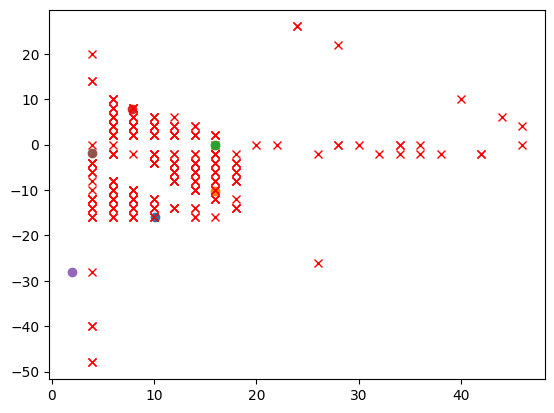

In [1160]:
import chipwhisperer.common.results.glitch as glitch
from tqdm.notebook import trange
import struct


%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure()


# gc.set_range("width", 0, 48)
# gc.set_range("offset", -48, 48)


import time
TIMES = 1
msg1 = 32*b'\x00'+b'\x00'+b'\x00'+b'\x00'+b'\x01'
msg = bytearray(msg1) #simpleserial uses bytearrays
# msg = bytearray([3]*32) #simpleserial uses bytearrays
for lext in range(2,6,1):
            scope.glitch.ext_offset = lext

            # Useless for voltage glitching
            for loff in range(-48, 48, 2):
                scope.glitch.offset = loff

                # Almost always INVALID after 23
                for lwid in range(0, 48, 2):
                    scope.glitch.width = lwid

                    for i in range(TIMES):                       
                        if scope.adc.state:
                            # can detect crash here (fast) before timing out (slow)
                            print("Trigger still high!")
                            collections['reset'] += [(lext, loff, lwid)]
                            plt.plot(lwid, loff, 'xr', alpha=1)
#                             fig.canvas.draw()
                            #record and reboot
                            scope.io.nrst = False
                            time.sleep(0.05)
                            scope.io.nrst = "high_z"
                            time.sleep(0.05)
                        
                        scope.arm()
                        target.simpleserial_write('g', msg)
                        ret = scope.capture()

                        time.sleep(0.1) #wait 1 min long time for WOTS
                        result = target.simpleserial_read_witherrors('r', 8, glitch_timeout=10)
 
                        if ret: #true means wime out
                            print('Timeout - no trigger')       
                            collections['reset'] += [(lext, loff, lwid)]
                            plt.plot(scope.glitch.width, scope.glitch.offset, 'xr', alpha=1)
#                             fig.canvas.draw()
                            #record and reboot
                            scope.io.nrst = False
                            time.sleep(0.05)
                            scope.io.nrst = "high_z"
                            time.sleep(0.05)
                        else:
                            if result['valid'] is True:
                                collections['valid'] += [(lext, loff, lwid)]
                                if result['payload'] :
                                    payload = result['payload'].hex()
                                    if payload[:16] != 'a4c02a1a56d15111': #msg+cnt
                                        print(lext,loff,lwid,i,payload[:64])
                                        collections['faulty'] += [(lext, loff, lwid)]
                                        plt.plot(scope.glitch.width, scope.glitch.offset, 'bo',alpha=1)
                                        fig.canvas.draw()
                            else: #reboot
#                                 scope.io.nrst = False
#                                 time.sleep(0.05)
#                                 scope.io.nrst = "high_z"
#                                 time.sleep(0.05) 
                                collections['reset'] += [(lext, loff, lwid)]
                               
#                              
print("Done glitching")

***Circle points are unsuccessful Fault injections which mismatch signatures***

In [1159]:
print(collections)

{'faulty': [(2, -16, 10), (2, 6, 10), (3, -22, 2)], 'reset': [(2, -18, 16), (2, -18, 18), (2, -16, 2), (2, -16, 4), (2, -16, 4), (2, -16, 6), (2, -16, 6), (2, -16, 8), (2, -16, 8), (2, -16, 10), (2, -16, 12), (2, -16, 14), (2, -16, 14), (2, -16, 16), (2, -14, 2), (2, -14, 4), (2, -14, 4), (2, -14, 6), (2, -14, 6), (2, -14, 8), (2, -14, 8), (2, -14, 10), (2, -14, 10), (2, -14, 12), (2, -14, 12), (2, -14, 14), (2, -14, 16), (2, -14, 18), (2, -12, 2), (2, -12, 4), (2, -12, 4), (2, -12, 6), (2, -12, 6), (2, -12, 8), (2, -12, 8), (2, -12, 10), (2, -12, 14), (2, -12, 16), (2, -12, 16), (2, -12, 18), (2, -10, 4), (2, -10, 6), (2, -10, 6), (2, -10, 8), (2, -10, 12), (2, -10, 14), (2, -10, 14), (2, -10, 16), (2, -10, 16), (2, -10, 18), (2, -8, 2), (2, -8, 4), (2, -8, 4), (2, -8, 6), (2, -8, 10), (2, -8, 12), (2, -8, 12), (2, -8, 14), (2, -8, 14), (2, -8, 16), (2, -8, 16), (2, -8, 18), (2, -6, 2), (2, -6, 4), (2, -6, 10), (2, -6, 12), (2, -6, 12), (2, -6, 14), (2, -6, 14), (2, -6, 16), (2, -6, 1

***We draw the points in a 3d grids to avoid the overlap***

In [1143]:
#reboot 
scope.io.nrst = False
time.sleep(0.05)
scope.io.nrst = "high_z"
time.sleep(0.05)

In [995]:
#disconnection
scope.dis()
target.dis()